In [43]:
import glob
from collections import defaultdict

import helper
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("ggplot")

In [45]:
metadata= pd.read_csv("dataset.csv")
train = metadata[metadata['Subset'] == "train"]
valid = metadata[metadata['Subset'] == "valid"]
test = metadata[metadata['Subset'] == "test"]

In [47]:
images = defaultdict(list)

lbls = []
for label in metadata[metadata['Original Subset'] != 'valid']['Label'].unique():
    for row in train[train['Label'] == label].iloc:
        image = helper.load_image(row['Image Path'])
        images[label].append(image)
        lbls.append(label)
    images[label] = np.stack(images[label])

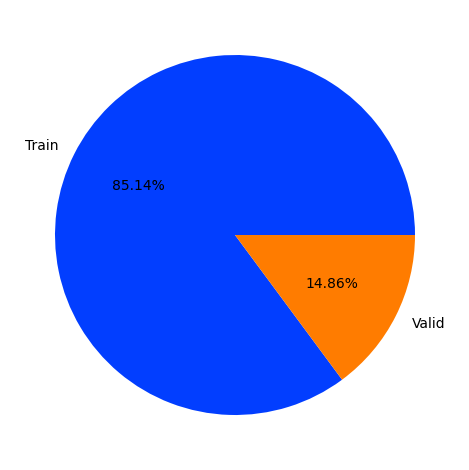

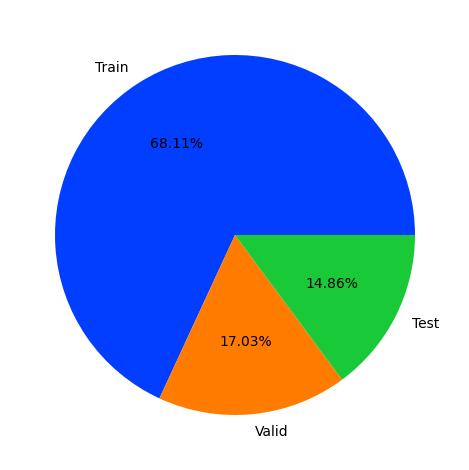

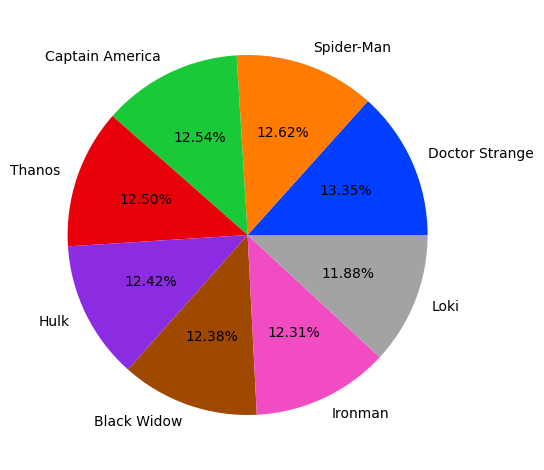

In [59]:
original_subset_distribution = metadata["Original Subset"].value_counts()
original_subset_distribution.index = [label.title() for label in original_subset_distribution.index]
plt.figure()
plt.pie(
    original_subset_distribution,
    labels=original_subset_distribution.index,
    colors=sns.color_palette("bright"),
    autopct="%.2f%%",
)
plt.tight_layout()
plt.savefig("logs/original_subset_distribution.pdf")

subset_distribution = metadata["Subset"].value_counts()
subset_distribution.index = [label.title() for label in subset_distribution.index]
plt.figure()
plt.pie(
    subset_distribution,
    labels=subset_distribution.index,
    colors=sns.color_palette("bright"),
    autopct="%.2f%%",
)
plt.tight_layout()
plt.savefig("logs/subset_distribution.pdf")

label_distribution = metadata[metadata['Original Subset'] != 'valid']["Label"].value_counts()
label_distribution.index = [label.title() for label in label_distribution.index]
plt.figure()
plt.pie(
    label_distribution,
    labels=label_distribution.index,
    colors=sns.color_palette("bright"),
    autopct="%.2f%%",
)
plt.tight_layout()
plt.savefig("logs/label_distribution.pdf")

In [60]:
imgs = []
lbls = []
for key in images:
    for image in images[key]:
        imgs.append(image.reshape(3, -1))
        lbls.append(key.title())
imgs = np.stack(imgs)

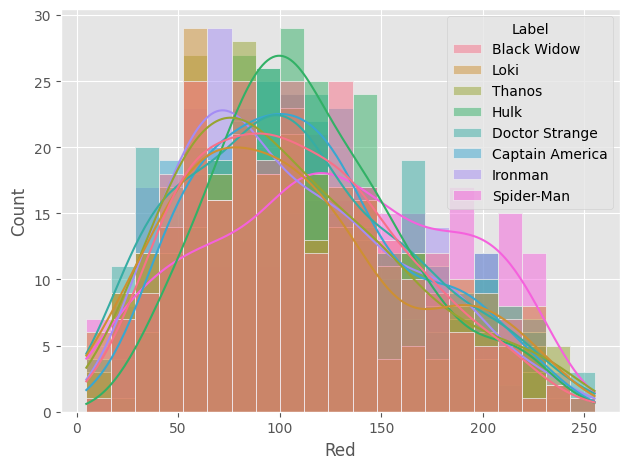

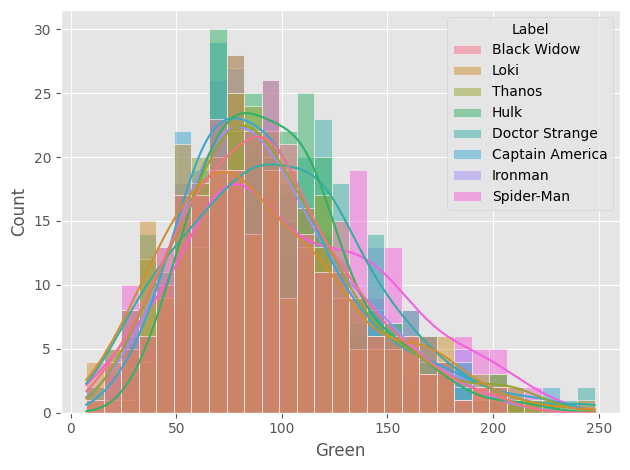

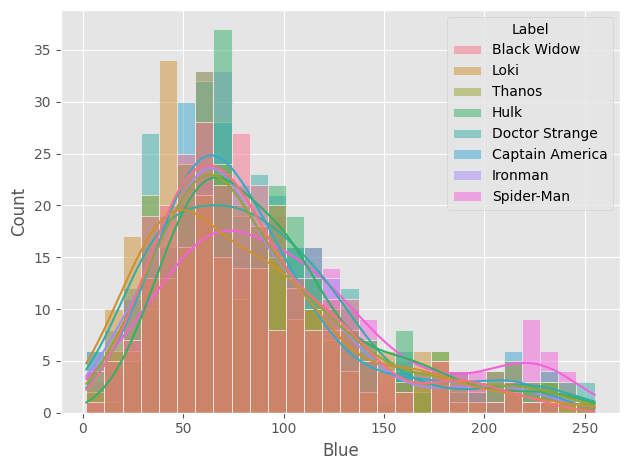

In [61]:
r, g, b = imgs.mean(2).transpose()
metadata_color_mean = pd.DataFrame({"Red": r, "Green": g, "Blue": b, "Label": lbls})
for color in metadata_color_mean.columns[:-1]:
    plt.figure()
    sns.histplot(data=metadata_color_mean, x=color, hue="Label", kde=True)
    plt.tight_layout()
    plt.savefig(f"logs/{color}_histogram.pdf")

'black widow (Mean)'

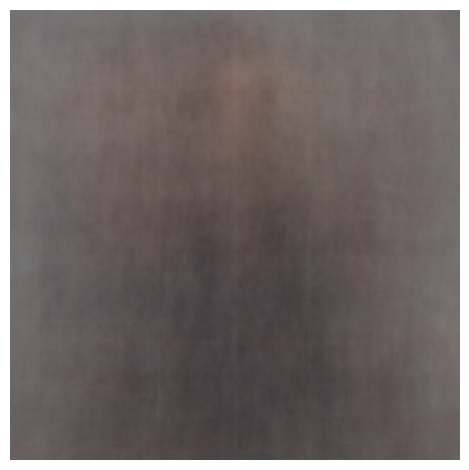

'black widow (Std)'

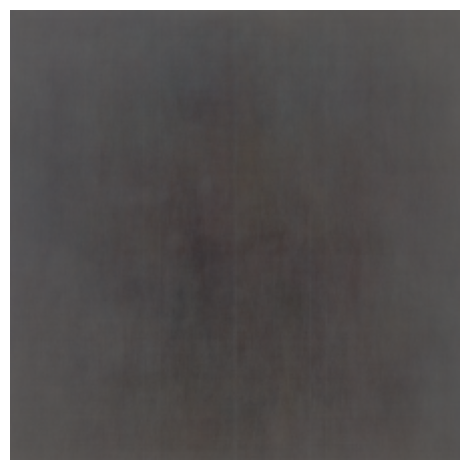

'loki (Mean)'

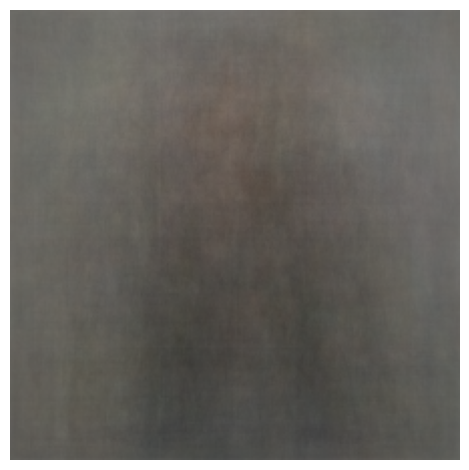

'loki (Std)'

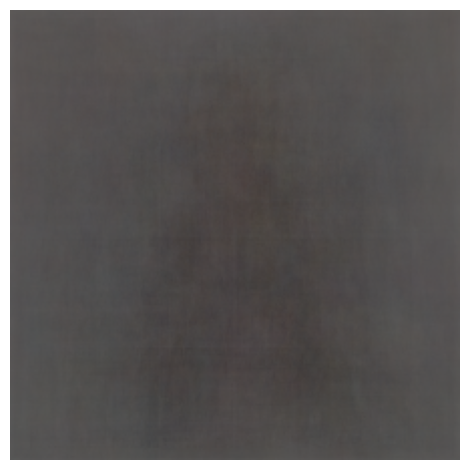

'thanos (Mean)'

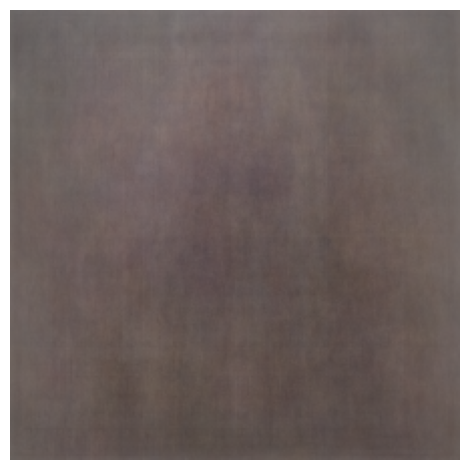

'thanos (Std)'

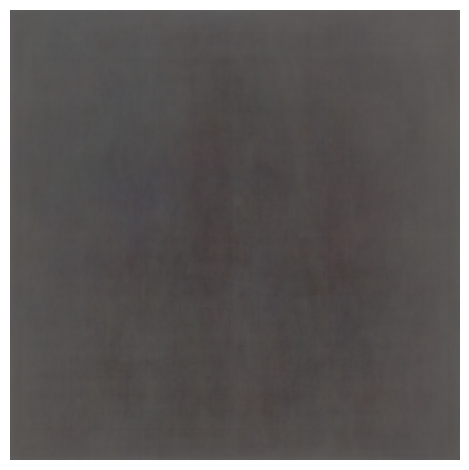

'hulk (Mean)'

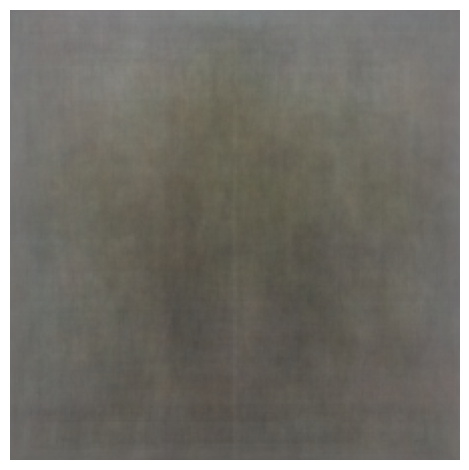

'hulk (Std)'

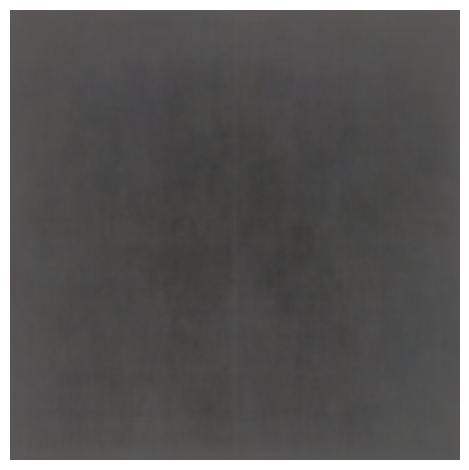

'doctor strange (Mean)'

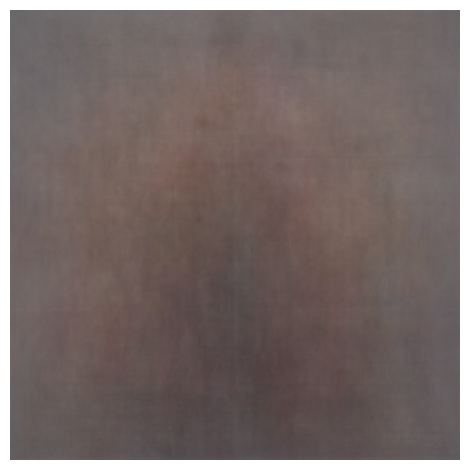

'doctor strange (Std)'

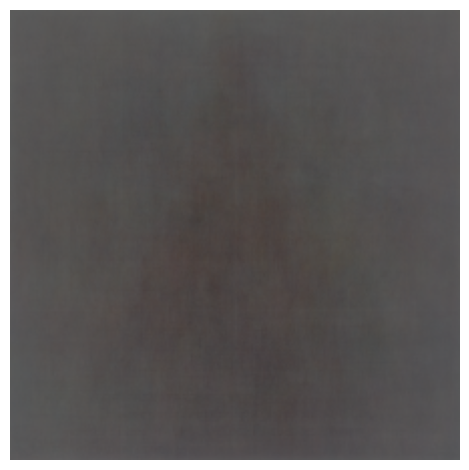

'captain america (Mean)'

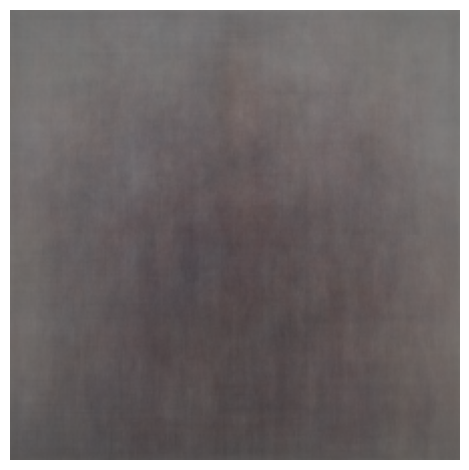

'captain america (Std)'

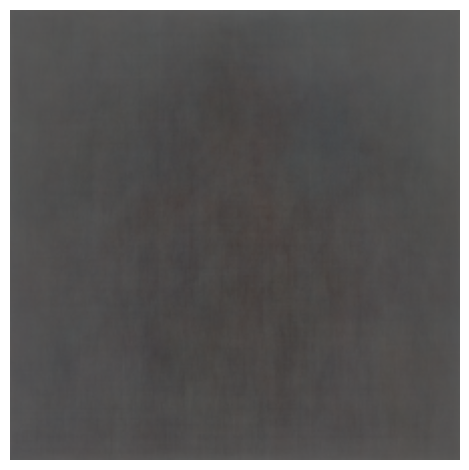

'ironman (Mean)'

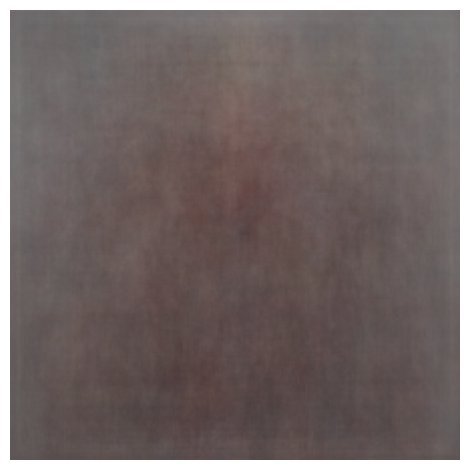

'ironman (Std)'

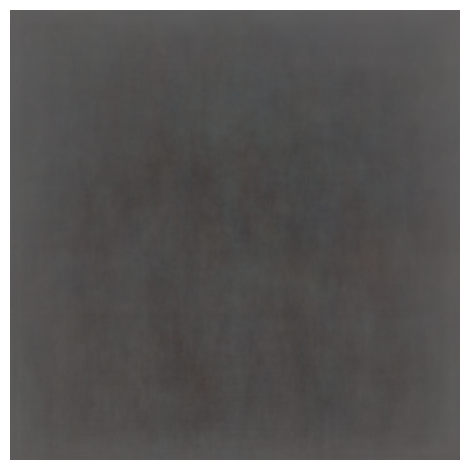

'spider-man (Mean)'

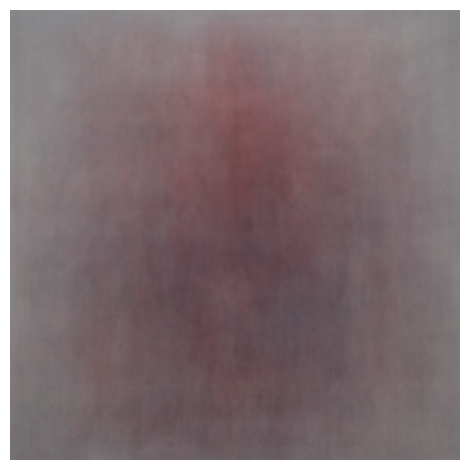

'spider-man (Std)'

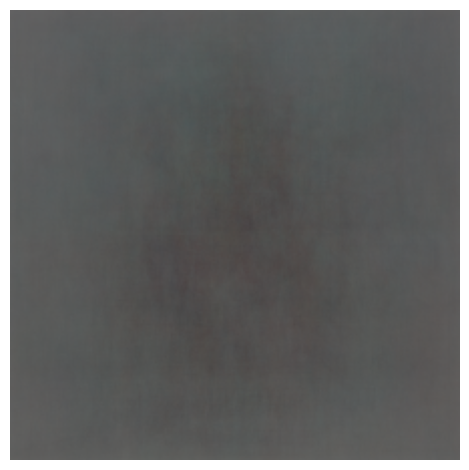

In [54]:
for key in images:
    display(f'{key} (Mean)')
    plt.figure()
    plt.axis("off")
    plt.imshow(images[key].mean(0) / 255)
    plt.tight_layout()
    plt.savefig(f'logs/std_{key}.pdf')
    plt.show()
    
    display(f'{key} (Std)')
    plt.figure()
    plt.axis("off")
    plt.imshow(images[key].std(0) / 255)
    plt.tight_layout()
    plt.savefig(f'logs/std_{key}.pdf')
    plt.show()